In [ ]:
!pip install tweepy
!pipi install wordcloud

In [1]:
import tweepy as tw
import pandas as pd
import csv
import matplotlib.pyplot as plt # Define a function to plot word cloud
from wordcloud import WordCloud, STOPWORDS
from wordcloud import WordCloud

In [2]:
consumer_key = 'eX5M5KFE2IdsEw6HJZVSVFbwh'
consumer_secret = 'ZuQzMwmucHgqFjnUcxb11BFkCEg56UtpRKMSM6C5XUSsIsQEcR'
access_token= '1673913469-vtjEgqpyeKXWGcWtpnx1jkxeml5fvfOH8LDWkGy'
access_token_secret = 'yoBo7esUoWm5DbgKKVd7ANB1LARgIHhjBsuVJceRptmkG'

In [3]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit = True)

In [58]:
IDs = ['jimcramer','criticalcharts', 'zipcharlie',  'stockstobuy', 'StocksToTrade']
count = 100
tweets = []

for ID in IDs :
    for tweet in tw.Cursor(api.user_timeline, id = ID , tweet_mode = 'extended').items(count):
        try:
            tweets += [[tweet.retweeted_status.full_text, tweet.created_at, ID, tweet.user.name, True]]
        except AttributeError:
            tweets += [[tweet.full_text, tweet.created_at, ID, tweet.user.name, False]]

            
tweets_tp = pd.DataFrame(tweets, columns = ['Text', 'Date', 'id', 'Name', 'Retweet'])
tweets_tp.to_csv('/Users/ali/Desktop/Twitter Scrapping/twitters_raw_data.csv', index = True)
tweets_tp.to_excel('/Users/ali/Desktop/Twitter Scrapping/twitter_raw_data.xlsx', index = True)

In [23]:
# In tshi cell I have tweeted on twitter with python

#api.update_status("My first tweet with python on twitter:))")

In [24]:
with open('/Users/ali/Desktop/Twitter Scrapping/twitters_raw_data.csv', 'r') as wer:
    line = wer.readlines()
    LINE = pd.DataFrame(line)
    print(line)

[',Text,Date,id,Name,Retweet\n', '0,"Opening ceremony of IEA World Congress coming up in 10 minutes (9:30 pm EDT), followed by panel discussion on Asian and Global Policy Issues https://t.co/jHRCweDYdS",2021-07-02 01:21:21,rodrikdani,Dani Rodrik,False\n', '1,"IEA WORLD CONGRESS\n', '\n', 'Opening Ceremony\n', '🗓️ Thursday 1 July 9:30 pm EDT\n', 'https://t.co/zRYLohxq7O\n', '\n', 'Panel on Asian and Global Policy Issues\n', '🗓️ Thursday 1 July 10:00 pm EDT\n', 'Speakers: Sri Mulyani Indrawati, Kaushik Basu, Mari Pangestu, Dani Rodrik\n', 'https://t.co/Uiz2fqxxXy",2021-07-01 21:37:13,rodrikdani,Dani Rodrik,True\n', '2,"Our paper is now available as an IZA Discussion Paper @iza_bonn \n', 'https://t.co/Jyqg2kBIba https://t.co/K3MshVb97j",2021-07-01 20:19:08,rodrikdani,Dani Rodrik,True\n', '3,"Really looking forward (and you should be too!) to this Efip panel tomorrow with @JonSteinsson  plus @gillian_brunet @WendyCarlinEcon @JWMason1    \n', 'moderated by @JosephEStiglitz. I\'ve learned a 

# Creating Word Cloud

In this section I have put the word cloud codes

In [25]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(10, 5))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

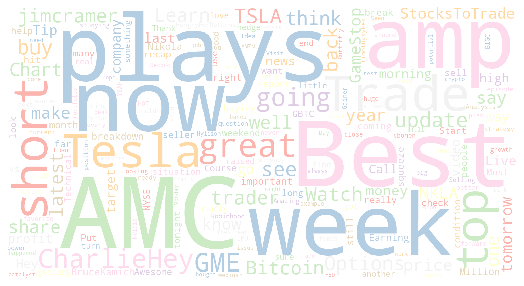

In [62]:
text = []
with open('/Users/ali/Desktop/Twitter Scrapping/twitters_raw_data.csv', 'r') as f:
    reader = csv.reader(f)
    text += [i[1] for i in reader]


text = ''.join(text)
STOPWORDS = STOPWORDS|{'stock', 'stocks', 'ep', 'market', 'take', 'folks', 'gt', 'Trading', 'today', 'day','option', 'play'}
wordcloud = WordCloud(width =1500, height = 800, random_state = 4, background_color='white', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)